# Texmining Lab 3 Data Mining
# Name: Oscar Bergling
# Id: a23Oscbe

In [1]:
#import my drive
from google.colab import drive
drive.mount('/content/drive')

#import my data
import sys
sys.path.insert(0,"/content/drive/My Drive/Data_for_colab")

Mounted at /content/drive


In [2]:
pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from collections import Counter

from nltk.corpus import stopwords
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *

nltk.download("punkt")
nltk.download("english")
nltk.download("stopwords")
nltk.download("wordnet")


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner
from gensim.models import Word2Vec

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading english: Package 'english' not found in
[nltk_data]     index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Methods that I will use for text exploration, pre-processing and model buildning

In [4]:
#used for token text
def tokenText(text):
  tokens = word_tokenize(text)
  return tokens

#calculate the lenght of each text
def getNumberWords(word_list):
  return len(word_list)

#remove stopwords and return new token list
def removeStopwords(tokens):
  stopw = stopwords.words("english")

  tokenlist = []
  for token in tokens:
    if token not in stopw:
      tokenlist.append(token)

  return tokenlist

#use stemming or lemmatization
def stemlem(tokens, typ):
    if typ == "stemming":
        stemmer = PorterStemmer()
        stemwords = [stemmer.stem(tok) for tok in tokens]
        return stemwords

    if typ == "lemmatization":
        lemmitazer = WordNetLemmatizer()
        lemwords = [lemmitazer.lemmatize(tok) for tok in tokens]
        return lemwords

#used for tf-idf vectorizer, own custom tokenzier
def custom_tokenizerStem(text):
  tokens = word_tokenize(text)
  stoplist = removeStopwords(tokens)
  stem = stemlem(stoplist, "stemming")
  return stem

#tf-idfvectorize to create matrix, return tf-idf matrix of the textes
#Im removing stopwords and using stemming.
def matrix(df):
  vect = TfidfVectorizer(tokenizer = custom_tokenizerStem, token_pattern = None)
  data = vect.fit_transform(df.text)

  arr = data.toarray()

  return arr

#used for gridsearch
def gridSearchCv(model, x, y, parameters):
  grid_search = GridSearchCV(model, parameters, cv = 10, verbose = 0, scoring = "accuracy")
  model_search = grid_search.fit(x,y)

  return model_search.best_params_

#count the words
def countWords(word_list, count):
  count.update(word_list)
  return count

#use the countWords methods to apply and get the count
def getCount(df_text):
  word_counter = Counter()
  df_text.apply(word_counter.update)
  return word_counter

# Question 1
 - 1. Explore and prepare the data (Tokenization, Stemming, Stopwords, visualization, etc.)

In [5]:
df_large = pd.read_csv("/content/drive/MyDrive/Data_for_colab/testmining_tweets.csv", encoding = "latin1")
df_large

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Can see that there a no columnd names. Must fix this.

In [6]:
column_names = df_large.columns
column_names

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

The right columns:
  - 1 --> sentiment (0 = negative, 2 = neutral, 4 = positive).
  - 2 --> Id
  - 3 --> date
  - 4 --> flag
  - 5 --> user
  - 6 --> text.

I will change the column names to these values.

In [7]:
df_large = df_large.rename(columns =
 {
     "0": "sentiment",
     "1467810369": "id",
     "Mon Apr 06 22:19:45 PDT 2009": "date",
     "NO_QUERY": "flag",
     "_TheSpecialOne_": "user",
     "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D": "text"
 })
df_large

,sentiment,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
#drop duplicated
dup = df_large[df_large.duplicated(subset = "text")]
dup

,sentiment,id,date,flag,user,text
1939,0,1468267465,Tue Apr 07 00:38:38 PDT 2009,NO_QUERY,ei8htyOne,and so the editing of 3000 wedding shots begins
2148,0,1468316454,Tue Apr 07 00:56:00 PDT 2009,NO_QUERY,Augustina22CA,"im lonely keep me company! 22 female, california"
3742,0,1468664220,Tue Apr 07 03:02:08 PDT 2009,NO_QUERY,FranciscoAndre,I'm not liking that new iTunes Pricing at all....
3745,0,1468664704,Tue Apr 07 03:02:17 PDT 2009,NO_QUERY,ammaryasir,"cant eat, drink or breath properly thanks to t..."
4162,0,1468756463,Tue Apr 07 03:33:56 PDT 2009,NO_QUERY,lkm1989,has a cold
...,...,...,...,...,...,...
1599500,4,2193453784,Tue Jun 16 08:28:49 PDT 2009,NO_QUERY,_cammi_,getting used to twitter
1599530,4,2193474515,Tue Jun 16 08:30:28 PDT 2009,NO_QUERY,majaricious,@KhloeKardashian Definitely my Mom. And Angeli...
1599677,4,2193503347,Tue Jun 16 08:32:47 PDT 2009,NO_QUERY,ShaneLemmon,goodmorning
1599767,4,2193528075,Tue Jun 16 08:34:48 PDT 2009,NO_QUERY,rach3lizabeth,Good morning everyone.


In [9]:
df_large = df_large.drop_duplicates()

In [10]:
zero = len(df_large[df_large["sentiment"] == 0])
two = len(df_large[df_large["sentiment"] == 2])
four = len(df_large[df_large["sentiment"] == 4])
print(zero, two, four)

799999 0 800000


Looks like there are only positive and negative tweets, no neutral. I will take 3000 of each (total = 6000).This was the maximum number of rows I could use for both time complexity and amount of RAM. This will also give a balanced dataset which is good when we are looking at accuracy, so that will be as "real" as possible.

I will also only use the text data. Id, date, flag, user will not be included in this text mining.


In [11]:
zero = df_large[df_large["sentiment"] == 0].head(3000)
four = df_large[df_large["sentiment"] == 4].head(3000)

df = pd.concat([zero[["sentiment","text"]],four[["sentiment","text"]]])
df

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
802994,4,@lollyjay Love the Snoopy background
802995,4,@scenariogirl I know one dog friendly office ...
802996,4,got the magic numbers and is thanking y'all fo...
802997,4,new to tweetar


Change 4 to 1 for the positive sentiment

In [12]:

def change(value):
  if value == 4:
    return 1
  else:
    return 0

df["sentiment"] = df["sentiment"].apply(change)
df

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
802994,1,@lollyjay Love the Snoopy background
802995,1,@scenariogirl I know one dog friendly office ...
802996,1,got the magic numbers and is thanking y'all fo...
802997,1,new to tweetar


Looking for null values

In [13]:
#check for null values
df.isnull().sum()

sentiment    0
text         0
dtype: int64

## Get number of words in each mail

In [14]:
#tokenize the text
df["tokens"] = df["text"].apply(tokenText)

df["token_len"] = df["tokens"].apply(getNumberWords)

In [15]:
#calculate the average length of each text
zero = df[df["sentiment"] == 0]
four = df[df["sentiment"] == 1]

print("Average length, positive:", zero["token_len"].mean())
print("Average length, negative:", four["token_len"].mean())

Average length, positive: 16.576666666666668
Average length, negative: 16.498333333333335


In [16]:
df

,sentiment,text,tokens,token_len
0,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, ca, n't, update, his, Fa...",25
1,0,@Kenichan I dived many times for the ball. Man...,"[@, Kenichan, I, dived, many, times, for, the,...",21
2,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",10
3,0,"@nationwideclass no, it's not behaving at all....","[@, nationwideclass, no, ,, it, 's, not, behav...",30
4,0,@Kwesidei not the whole crew,"[@, Kwesidei, not, the, whole, crew]",6
...,...,...,...,...
802994,1,@lollyjay Love the Snoopy background,"[@, lollyjay, Love, the, Snoopy, background]",6
802995,1,@scenariogirl I know one dog friendly office ...,"[@, scenariogirl, I, know, one, dog, friendly,...",13
802996,1,got the magic numbers and is thanking y'all fo...,"[got, the, magic, numbers, and, is, thanking, ...",11
802997,1,new to tweetar,"[new, to, tweetar]",3


Show word length in graphs by using histplot

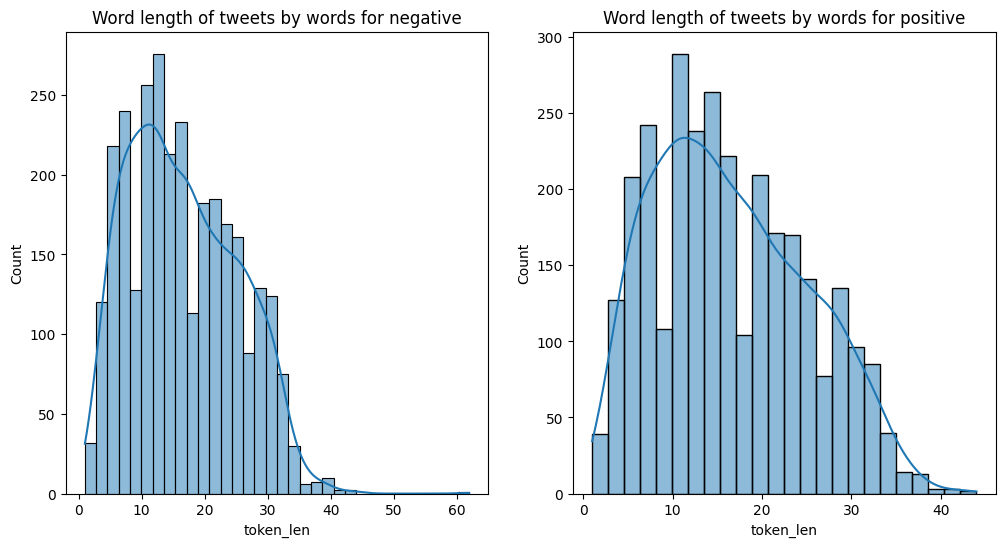

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(zero["token_len"], kde = "True", ax = ax1)
ax1.set_title("Word length of tweets by words for negative")

sns.histplot(four["token_len"], kde = "True", ax = ax2)
ax2.set_title("Word length of tweets by words for positive")

plt.show()

Can see that the lenght of both negative and positive tweets have similar distribution of the length of each tweet. Both have the highest amount of tweets with around 10-15 tokens long.

Look at min, max etc

In [18]:
zero.describe()

,sentiment,token_len
count,3000.0,3000.000000
mean,0.0,16.576667
std,0.0,8.533838
min,0.0,1.000000
25%,0.0,10.000000
50%,0.0,16.000000
75%,0.0,23.000000
max,0.0,62.000000


In [19]:
four.describe()

,sentiment,token_len
count,3000.0,3000.000000
mean,1.0,16.498333
std,0.0,8.538987
min,1.0,1.000000
25%,1.0,10.000000
50%,1.0,15.000000
75%,1.0,23.000000
max,1.0,44.000000


Can also see that the mean, min, max etc is also similar. This is most likely because tweets has an max length of around 280 words but also because tweets are made to be short. Thus, notning special here.

## Get how many uniqe words negative and positive tweets have

In [20]:
data = {"type": ["both","positive","negative"],
    "Unique words": [len(getCount(df["tokens"])), len(getCount(four["tokens"])), len(getCount(zero["tokens"]))]}

df_unique = pd.DataFrame(data)
df_unique

,type,Unique words
0,both,14970
1,positive,9387
2,negative,8666


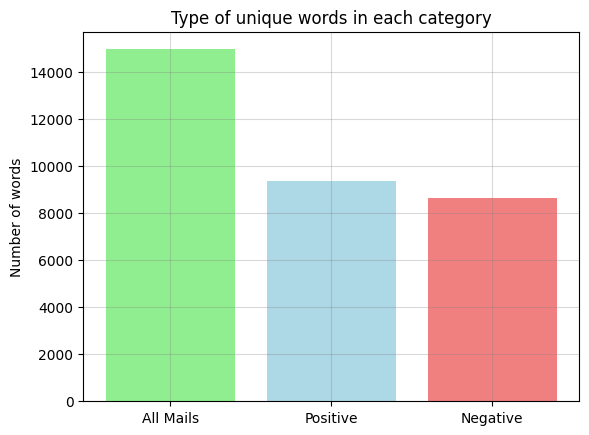

In [21]:
type_mail = list(df_unique["type"])
count = list(df_unique["Unique words"])

plt.bar(type_mail, count, color = ["lightgreen","lightblue","lightcoral"])
plt.title("Type of unique words in each category")
plt.ylabel("Number of words")
plt.grid(color="gray", alpha=0.3)
plt.xticks(type_mail, ["All Mails","Positive","Negative"])
plt.show()

Can see that we have quite a lot unique words in both. Similar amount of unique words are in positive and negative.

## Look at top 10 occuring words

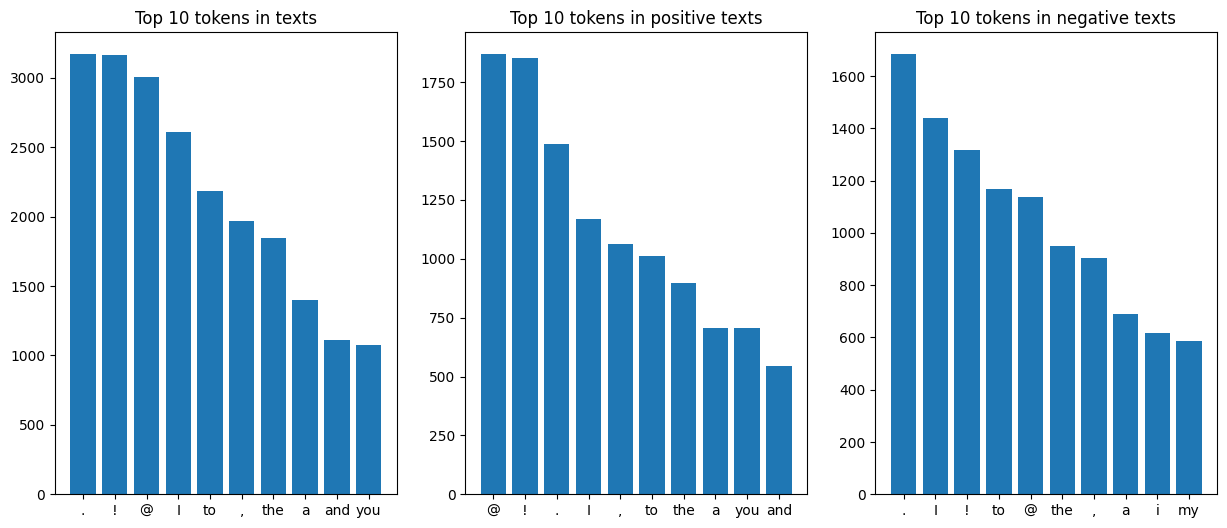

In [22]:
#create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

#dic with top 10 values by count
dic_10_all = dict(sorted(getCount(df["tokens"]).items(), key=lambda x: x[1], reverse = True)[:10])
dic_10_four = dict(sorted(getCount(four["tokens"]).items(), key=lambda x: x[1], reverse = True)[:10])
dic_10_zero = dict(sorted(getCount(zero["tokens"]).items(), key=lambda x: x[1], reverse = True)[:10])


#get keys and values for plot
words_all = list(dic_10_all.keys())
counts_all = list(dic_10_all.values())

words_safe = list(dic_10_four.keys())
counts_safe = list(dic_10_four.values())

words_spam = list(dic_10_zero.keys())
counts_spam = list(dic_10_zero.values())

#plot everything
ax1.bar(words_all, counts_all)
ax1.set_title("Top 10 tokens in texts")

ax2.bar(words_safe, counts_safe)
ax2.set_title("Top 10 tokens in positive texts")

ax3.bar(words_spam, counts_spam)
ax3.set_title("Top 10 tokens in negative texts")

plt.show()

Can see that there are most "non-words" that are occuring in the tweets. Can also see some word. Can test by removing stopwords and see if we get any difference.

## Remove stopwords

In [23]:
df["token_re_stop"] = df["tokens"].apply(removeStopwords) #removeStopwords used to remove stopword
four = df[df["sentiment"] == 1]
zero = df[df["sentiment"] == 0]

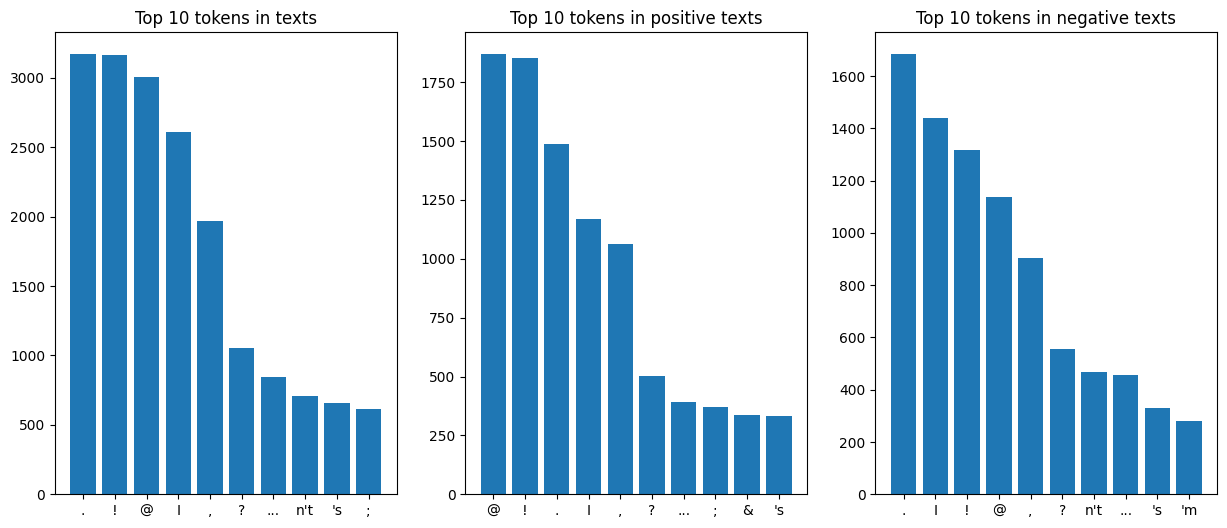

In [24]:
#create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

#dic with top 10 values by count
dic_10_all = dict(sorted(getCount(df["token_re_stop"]).items(), key=lambda x: x[1], reverse = True)[:10])
dic_10_four = dict(sorted(getCount(four["token_re_stop"]).items(), key=lambda x: x[1], reverse = True)[:10])
dic_10_zero = dict(sorted(getCount(zero["token_re_stop"]).items(), key=lambda x: x[1], reverse = True)[:10])


#get keys and values for plot
words_all = list(dic_10_all.keys())
counts_all = list(dic_10_all.values())

words_safe = list(dic_10_four.keys())
counts_safe = list(dic_10_four.values())

words_spam = list(dic_10_zero.keys())
counts_spam = list(dic_10_zero.values())

#plot everything
ax1.bar(words_all, counts_all)
ax1.set_title("Top 10 tokens in texts")

ax2.bar(words_safe, counts_safe)
ax2.set_title("Top 10 tokens in positive texts")

ax3.bar(words_spam, counts_spam)
ax3.set_title("Top 10 tokens in negative texts")

plt.show()

Can still see that it is mostly special tokens that are occurring most often. Can also see that the stopwords has been removed.

Can use a wordcloud to get a better picture on the words. Will show without stopwords, because stopwords will anyway be removed for the model.

One could probably also remove these "non-words" tokens. I’m not going to do that because I think these could have a meaning for the sentiment.


## Wordcloud

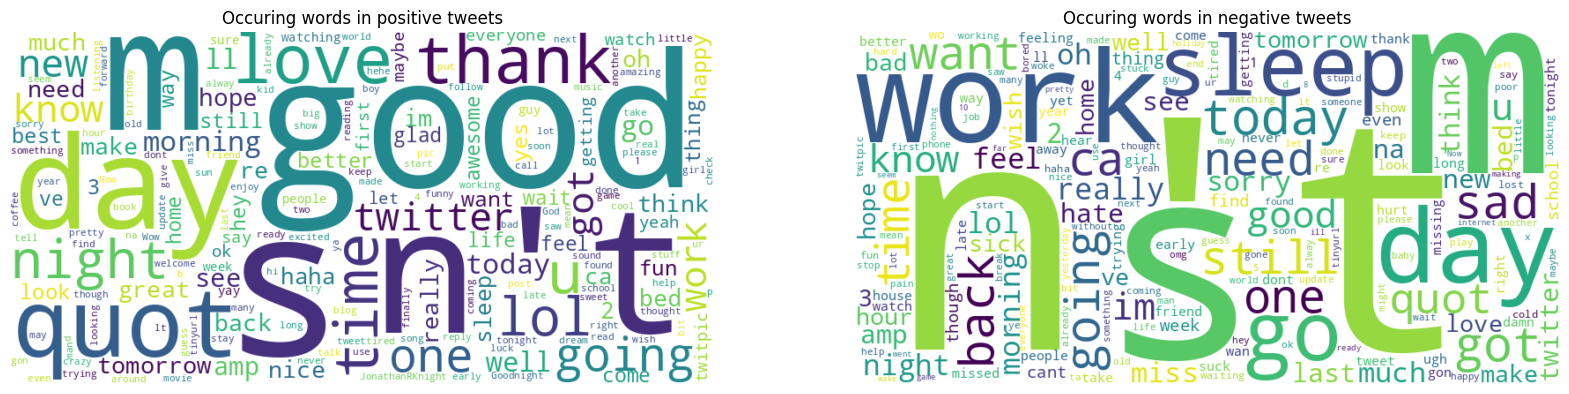

In [25]:

#non-spam mails
result_four = four["token_re_stop"].apply(lambda x: " ".join(x)) #convert from list to no list
string_safe = " ".join(result_four) #make a string of all rows

#spam
result_zero = zero["token_re_stop"].apply(lambda x: " ".join(x))
string_spam = " ".join(result_zero)

fig, (ax1) = plt.subplots(1, 2, figsize=(20, 10))

#create non-spam wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, include_numbers = True).generate(string_safe)
ax1[0].imshow(wordcloud, interpolation="bilinear")
ax1[0].axis("off")
ax1[0].set_title("Occuring words in positive tweets")

#creat spam wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False, include_numbers = True).generate(string_spam)
ax1[1].imshow(wordcloud, interpolation="bilinear")
ax1[1].axis("off")
ax1[1].set_title("Occuring words in negative tweets")

plt.show()

### Can also see with Stemming

In [26]:
df["tokens_stem"] = df["tokens"].apply(stemlem, args = ("stemming",))

In [27]:
df

,sentiment,text,tokens,token_len,token_re_stop,tokens_stem
0,0,is upset that he can't update his Facebook by ...,"[is, upset, that, he, ca, n't, update, his, Fa...",25,"[upset, ca, n't, update, Facebook, texting, .....","[is, upset, that, he, ca, n't, updat, hi, face..."
1,0,@Kenichan I dived many times for the ball. Man...,"[@, Kenichan, I, dived, many, times, for, the,...",21,"[@, Kenichan, I, dived, many, times, ball, ., ...","[@, kenichan, i, dive, mani, time, for, the, b..."
2,0,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",10,"[whole, body, feels, itchy, like, fire]","[my, whole, bodi, feel, itchi, and, like, it, ..."
3,0,"@nationwideclass no, it's not behaving at all....","[@, nationwideclass, no, ,, it, 's, not, behav...",30,"[@, nationwideclass, ,, 's, behaving, ., 'm, m...","[@, nationwideclass, no, ,, it, 's, not, behav..."
4,0,@Kwesidei not the whole crew,"[@, Kwesidei, not, the, whole, crew]",6,"[@, Kwesidei, whole, crew]","[@, kwesidei, not, the, whole, crew]"
...,...,...,...,...,...,...
802994,1,@lollyjay Love the Snoopy background,"[@, lollyjay, Love, the, Snoopy, background]",6,"[@, lollyjay, Love, Snoopy, background]","[@, lollyjay, love, the, snoopi, background]"
802995,1,@scenariogirl I know one dog friendly office ...,"[@, scenariogirl, I, know, one, dog, friendly,...",13,"[@, scenariogirl, I, know, one, dog, friendly,...","[@, scenariogirl, i, know, one, dog, friendli,..."
802996,1,got the magic numbers and is thanking y'all fo...,"[got, the, magic, numbers, and, is, thanking, ...",11,"[got, magic, numbers, thanking, y'all, support]","[got, the, magic, number, and, is, thank, y'al..."
802997,1,new to tweetar,"[new, to, tweetar]",3,"[new, tweetar]","[new, to, tweetar]"


In [28]:
four = df[df["sentiment"] == 1]
zero = df[df["sentiment"] == 0]

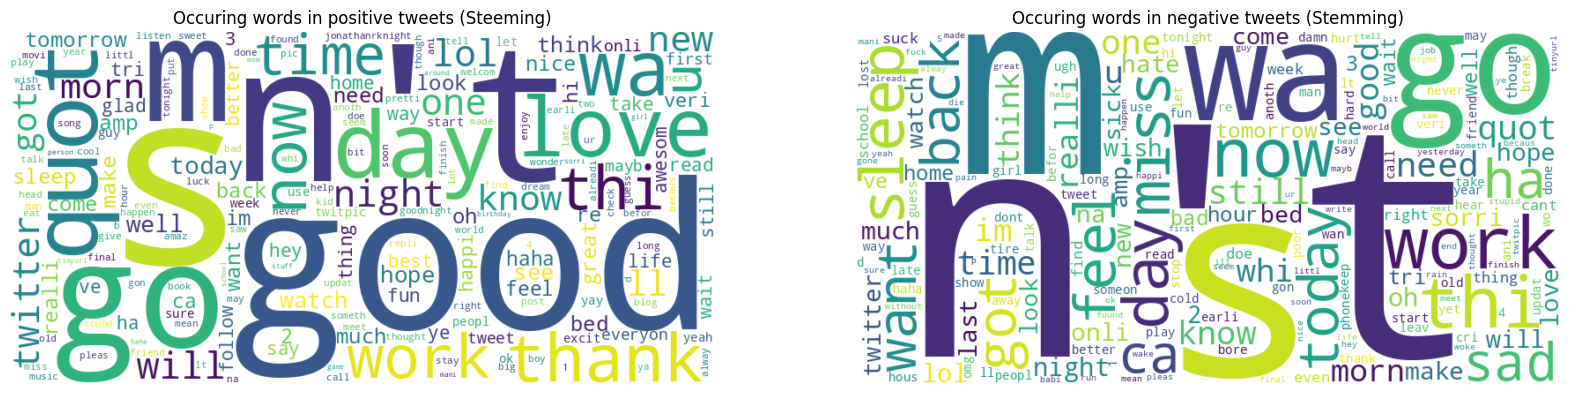

In [31]:
result_four = four["tokens_stem"].apply(lambda x: " ".join(x)) #convert from list to no list
string_safe = " ".join(result_four) #make a string of all rows

result_zero = zero["tokens_stem"].apply(lambda x: " ".join(x))
string_spam = " ".join(result_zero)

fig, (ax1) = plt.subplots(1, 2, figsize=(20, 10))


wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, include_numbers = True).generate(string_safe)
ax1[0].imshow(wordcloud, interpolation="bilinear")
ax1[0].axis("off")
ax1[0].set_title("Occuring words in positive tweets (Steeming)")


wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False, include_numbers = True).generate(string_spam)
ax1[1].imshow(wordcloud, interpolation="bilinear")
ax1[1].axis("off")
ax1[1].set_title("Occuring words in negative tweets (Stemming)")

plt.show()

Here do we get a better picture of what kind of words that are occurring. "day" seems to be present in both negative and positive tweets. For positive does it seems to be more "positive" words, like: "thank", "love" "good". For the negative tweets is there mostly single letters.

There are no real difference between stemming and only remove stopwords.


# 2. Build a BOW and train a KNN, Decision Tree, and SVM model

# Modeling.

Three models will be trained and used for classification:
  - KNN
  - Decision Tree.
  - SVM.

These will be evaluated with primary accuracy because this is a balanced dataset, thus this should give a good representation. Will also use an confusion matrix.

To be able to use these models, must the texts be converted to vectors. This is done by bag of words and uses TF-IDF to represent each word as numbers.

This is done with Tfidfcountvectorizer from sci-kit learn. This will both create the bag of words first and then calculate the tf-idf. This will return an matrix, where the columns are the words and the rows are the texts.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

### GridSearchCv
I also tested with GridSearchCv to get the best hyperparameters for the tree models.

***My initial plan was to use GridSearchCV to search for the best parameters for KNN, Decision Tree, and SVM. I was able to generate for KNN and Decision Tree, these are used in respective model. For SVM did it take too much time and I was not able to generate any good results. Thus, Im using the default parameters for SVM***


In [ ]:
#store the results for all models
list_all = []

In [ ]:
#split the data
x = matrix(df) #the tf-idf matrix, removing stopwords and using stemming.
y = df["sentiment"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


##KNN

In [ ]:
"""
parameters = {
    "n_neighbors": [i for i in range(3)],
    "weights": ["uniform","distance"],
    "algorithm":["auto","ball_tree","brute"]
}

#model
knn = KNeighborsClassifier()

knn_best = gridSearchCv(knn, x_train, y_train, parameters)
knn_best
"""

'\nparameters = {\n    "n_neighbors": [i for i in range(3)],\n    "weights": ["uniform","distance"],\n    "algorithm":["auto","ball_tree","brute"]\n}\n\n#model\nknn = KNeighborsClassifier()\n\nknn_best = gridSearchCv(knn, x_train, y_train, parameters)\nknn_best\n'

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       613
           1       0.65      0.56      0.60       587

    accuracy                           0.63      1200
   macro avg       0.64      0.63      0.63      1200
weighted avg       0.64      0.63      0.63      1200



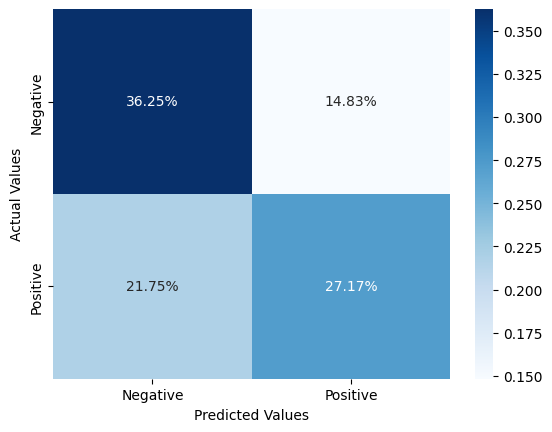

In [ ]:
def KNNModel(x_train, y_train, x_test, y_test):
  knn = KNeighborsClassifier(algorithm = "auto", n_neighbors = 3, p = 1, weights = "distance")
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)


  precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
  data_df = {"Model": [f"KNN", f"KNN"],
        "positive/negative": ["negative","positive"],
        "Precision":[precision[0], precision[1]],
        "Recall":[recall[0],recall[1]],
        "fscore":[fscore[0],fscore[1]],
        "Accuracy":[accuracy_score(y_test, y_pred), 0]}

  df_score = pd.DataFrame(data = data_df)

  report = classification_report(y_test, y_pred)
  print(report)
  metrix = confusion_matrix(y_test,y_pred)
  sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Negative","Positive"],yticklabels = ["Negative","Positive"])
  plt.xlabel("Predicted Values")
  plt.ylabel("Actual Values")

  return df_score

df_score_KNN = KNNModel(x_train, y_train, x_test, y_test)
list_all.append(df_score_KNN)

## Decision Tree

In [ ]:
"""
parameters ={
    "criterion": ["gini","entropy","log_loss"],
    "splitter": ["best","random"],
    "max_depth": [5,10,15,20],
}

treeModel = DecisionTreeClassifier()

best_para_tree = gridSearchCv(treeModel, x_train, y_train, parameters)
best_para_tree
"""

'\nparameters ={\n    "criterion": ["gini","entropy","log_loss"],\n    "splitter": ["best","random"],\n    "max_depth": [5,10,15,20],\n}\n\ntreeModel = DecisionTreeClassifier()\n\nbest_para_tree = gridSearchCv(treeModel, x_train, y_train, parameters)\nbest_para_tree\n'

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       613
           1       0.63      0.68      0.65       587

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200



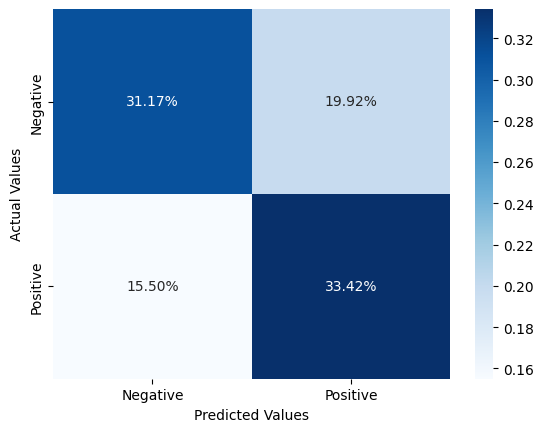

In [ ]:

def decisionTree(x_train, y_train, x_test, y_test):
  treeModel = DecisionTreeClassifier(criterion = "gini",max_depth = 20, splitter = "best")
  treeModel.fit(x_train, y_train)
  y_pred = treeModel.predict(x_test)

  precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
  data_df = {"Model": [f"DecisionTree", f"DecisionTree"],
        "positive/negative": ["negative","positive"],
        "Precision":[precision[0], precision[1]],
        "Recall":[recall[0],recall[1]],
        "fscore":[fscore[0],fscore[1]],
        "Accuracy":[accuracy_score(y_test, y_pred), 0]}

  df_score = pd.DataFrame(data = data_df)

  report = classification_report(y_test, y_pred)
  print(report)

  metrix = confusion_matrix(y_test,y_pred)
  sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Negative","Positive"],yticklabels = ["Negative","Positive"])
  plt.xlabel("Predicted Values")
  plt.ylabel("Actual Values")
  return df_score

df_score_tree = decisionTree(x_train, y_train, x_test, y_test)
list_all.append(df_score_tree)

##SVM

In [ ]:
"""
parameters = {
    "C":[ 0.5, 1, 5],
    "kernel": ["linear","rbf"],
    "gamma": [1, 0.1]
}

svmModel = svm.SVC()

best_para_svm = gridSearchCv(svmModel, x_train, y_train, parameters)
best_para_svm
"""

'\nparameters = {\n    "C":[ 0.5, 1, 5],\n    "kernel": ["linear","rbf"],\n    "gamma": [1, 0.1]\n}\n\nsvmModel = svm.SVC()\n\nbest_para_svm = gridSearchCv(svmModel, x_train, y_train, parameters)\nbest_para_svm\n'

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       613
           1       0.69      0.75      0.72       587

    accuracy                           0.72      1200
   macro avg       0.72      0.72      0.72      1200
weighted avg       0.72      0.72      0.72      1200



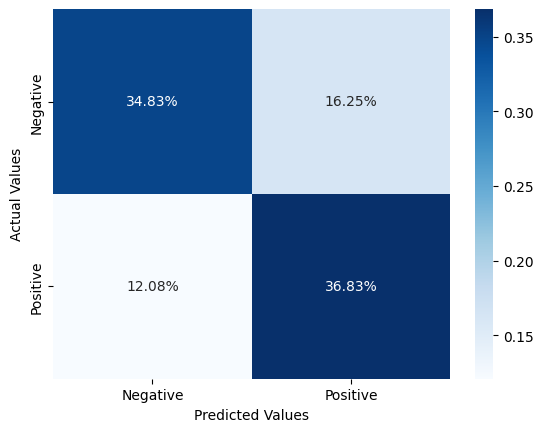

In [ ]:
def SVM(x_train, y_train, x_test, y_test):
  svmModel = svm.SVC()
  svmModel.fit(x_train, y_train)
  y_pred = svmModel.predict(x_test)

  precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
  data_df = {"Model": [f"SVM", f"SVM"],
        "positive/negative": ["negative","positive"],
        "Precision":[precision[0], precision[1]],
        "Recall":[recall[0],recall[1]],
        "fscore":[fscore[0],fscore[1]],
        "Accuracy":[accuracy_score(y_test, y_pred), 0]}

  df_score_svm = pd.DataFrame(data = data_df)

  report = classification_report(y_test, y_pred)
  print(report)

  metrix = confusion_matrix(y_test,y_pred)
  sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Negative","Positive"],yticklabels = ["Negative","Positive"])
  plt.xlabel("Predicted Values")
  plt.ylabel("Actual Values")

  return df_score_svm

df_score_svm = SVM(x_train, y_train, x_test, y_test)
list_all.append(df_score_svm)


#3. Evaluate the above models (confusion matrix, accuracy, classification report, etc.)

This can be seen in the last bit of the code. After "Compare results from KNN, Decision Tree and SVM model with CNN.

#4. Use one of the word embeddings (word2vec, Glove, fasText) and build a CNN model and compare the result with question 2.

##Word2vec

The Word2Vec model will be trained on this specific data.

Must create an embedding matrix which is used in the first layer of the CNN. This will be used as weights for our CNN.

Must make all texts to the same length, this will be done with pad_sequence. This must be done to be able to feed the text in the CNN.

Also need to convert the words into integers, this is needed for the CNN. This is here done with Tokenizer from tensorflow.

Sources:

https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

https://radimrehurek.com/gensim/models/word2vec.html

https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/

https://keras.io/api/data_loading/timeseries/

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

https://stackoverflow.com/questions/42943291/what-does-keras-io-preprocessing-sequence-pad-sequences-do

https://medium.com/analytics-vidhya/convolutional-neuronal-network-with-keras-tuner-on-cifar-10-b4271ca4643d


In [ ]:
x = df["tokens_stem"] #only removing stopwords here
y = df["sentiment"]

x_train, x_values, y_train, y_values = train_test_split(x, y, test_size = 0.3, random_state = 42)

x_val, x_test, y_val, y_test = train_test_split(x_values, y_values, test_size = 0.5, random_state = 42)

In [ ]:
#trained model on the data
to_train_word = df["tokens_stem"]
sentence = [text for text in to_train_word] #each text will be an sentence here
w2vModel = Word2Vec(sentence)

In [ ]:
print(sentence)

[['is', 'upset', 'that', 'he', 'ca', "n't", 'updat', 'hi', 'facebook', 'by', 'text', 'it', '...', 'and', 'might', 'cri', 'as', 'a', 'result', 'school', 'today', 'also', '.', 'blah', '!'], ['@', 'kenichan', 'i', 'dive', 'mani', 'time', 'for', 'the', 'ball', '.', 'manag', 'to', 'save', '50', '%', 'the', 'rest', 'go', 'out', 'of', 'bound'], ['my', 'whole', 'bodi', 'feel', 'itchi', 'and', 'like', 'it', 'on', 'fire'], ['@', 'nationwideclass', 'no', ',', 'it', "'s", 'not', 'behav', 'at', 'all', '.', 'i', "'m", 'mad', '.', 'whi', 'am', 'i', 'here', '?', 'becaus', 'i', 'ca', "n't", 'see', 'you', 'all', 'over', 'there', '.'], ['@', 'kwesidei', 'not', 'the', 'whole', 'crew'], ['need', 'a', 'hug'], ['@', 'loltrish', 'hey', 'long', 'time', 'no', 'see', '!', 'ye', '..', 'rain', 'a', 'bit', ',', 'onli', 'a', 'bit', 'lol', ',', 'i', "'m", 'fine', 'thank', ',', 'how', "'s", 'you', '?'], ['@', 'tatiana_k', 'nope', 'they', 'did', "n't", 'have', 'it'], ['@', 'twittera', 'que', 'me', 'muera', '?'], ['spri

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train.tolist())

#convert word to int
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x_val = tokenizer.texts_to_sequences(x_val)

In [ ]:
#make all textes equal size
x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen = 100)
x_val = pad_sequences(x_val, maxlen = 100)

In [ ]:
length = len(tokenizer.word_index) + 1
length

8815

In [ ]:
#create embedding matrix where each row is a word and is represented by and dense vector
embedding_matrix = np.zeros((length, 100))

for count, word in enumerate(w2vModel.wv.index_to_key):
  if count < length:
    embedding_matrix[count] = w2vModel.wv[word]

embedding_matrix

array([[-0.16996965,  0.26432008,  0.22074102, ..., -0.32431674,
         0.23475114, -0.07512148],
       [-0.19274387,  0.28926516,  0.24612941, ..., -0.12053052,
         0.08656667, -0.03504568],
       [-0.32815054,  0.49878627,  0.07392985, ..., -0.27785715,
         0.35385442, -0.49092475],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

### Fine tune and create CNN with best hyperparameters

In [ ]:
#fine tune the model with keras tune

#create model
def model(hp): #hp = hypertuning
  model = keras.Sequential()

  #embedding layer
  model.add(Embedding(length, 100, weights = [embedding_matrix], input_length = 100, trainable = False))#size of vocabulary, dimension of the dense embedding, embedding matrix as weight, input of the x_train

  #conv1D layer for texts
  for i in range(hp.Int("num_layers", 1, 4)):
    model.add(Conv1D(hp.Int(f'conv_{i}_units',
                                min_value=32,
                                max_value=256,
                                step=32), kernel_size = 3, activation = "relu"))

  model.add(MaxPooling1D(pool_size=2))

  model.add(Flatten())

  #hidden layers
  for i in range(hp.Int("num_layers", 1, 4)):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=128, step=32),
                activation=hp.Choice("activation", ["relu", "tanh","sigmoid"]),
            )
        )

  #output layers
  model.add(layers.Dense(units=1, activation=hp.Choice('activation_output', values=['linear', 'relu', 'tanh'])))

  #optimze the learning rate
  hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])

  #build the model
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss = "mean_squared_error")

  return model

tuner = keras_tuner.RandomSearch(
    model,
    objective='val_loss',
    max_trials=5,
    directory='my_dir_1',
    project_name='my_project_1'
    )

#get best parameters
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
best_hyperparameters = tuner.get_best_hyperparameters()[0]

best_hyperparameters.values

Reloading Tuner from my_dir_1/my_project_1/tuner0.json


{'num_layers': 1,
 'conv_0_units': 64,
 'units_0': 64,
 'activation': 'relu',
 'activation_output': 'tanh',
 'learning_rate': 0.0001,
 'conv_1_units': 160,
 'conv_2_units': 192,
 'conv_3_units': 224,
 'units_1': 128,
 'units_2': 128,
 'units_3': 64}

In [ ]:
#create model from the betst hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

hist = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks = [early_stopping])

Epoch 1/100
132/132 [==============================] - 6s 32ms/step - loss: 0.7895 - accuracy: 0.5100 - val_loss: 0.7256 - val_accuracy: 0.5067
Epoch 2/100
132/132 [==============================] - 3s 22ms/step - loss: 0.6931 - accuracy: 0.5352 - val_loss: 0.7343 - val_accuracy: 0.4833
Epoch 3/100
132/132 [==============================] - 2s 18ms/step - loss: 0.6881 - accuracy: 0.5543 - val_loss: 0.7437 - val_accuracy: 0.4867
Epoch 4/100
132/132 [==============================] - 2s 18ms/step - loss: 0.6787 - accuracy: 0.5655 - val_loss: 0.7055 - val_accuracy: 0.5011
Epoch 5/100
132/132 [==============================] - 2s 17ms/step - loss: 0.6736 - accuracy: 0.5805 - val_loss: 0.7304 - val_accuracy: 0.5222
Epoch 6/100
132/132 [==============================] - 3s 24ms/step - loss: 0.6655 - accuracy: 0.5924 - val_loss: 0.7448 - val_accuracy: 0.5256
Epoch 7/100
132/132 [==============================] - 4s 30ms/step - loss: 0.6652 - accuracy: 0.6021 - val_loss: 0.7091 - val_accuracy:

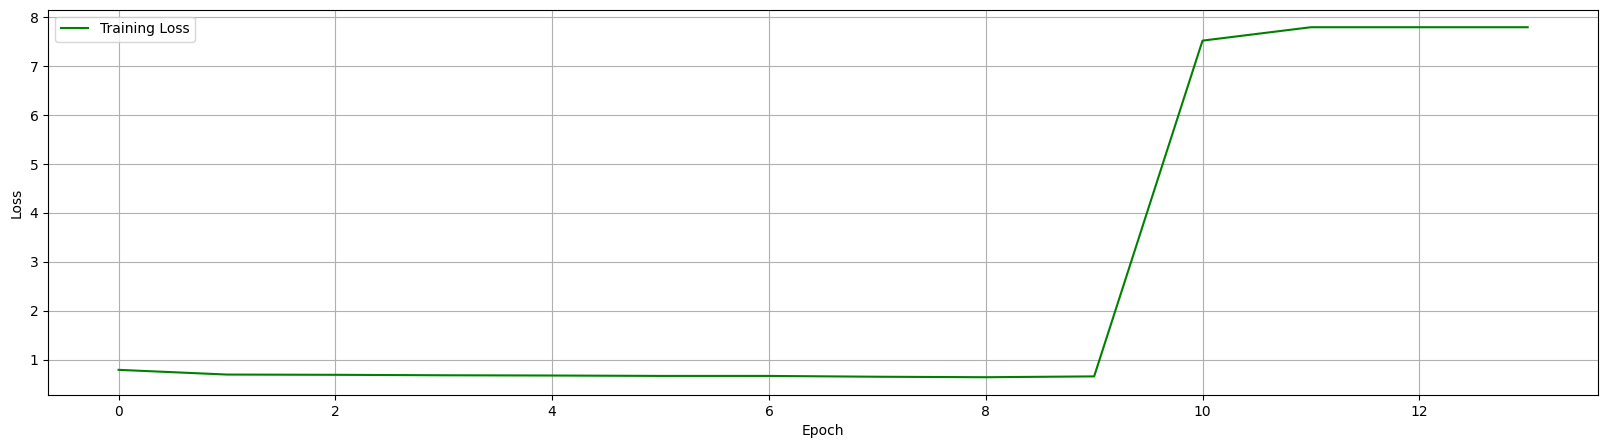

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(hist.history['loss'], 'g', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

29/29 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       460
           1       0.00      0.00      0.00       440

    accuracy                           0.51       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.26      0.51      0.35       900



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

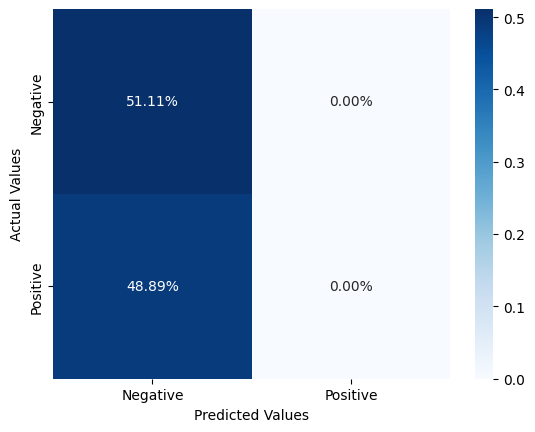

In [ ]:
y_pred = model.predict(x_test)

#convert y_pred to zero or 1, over 0.5 return 1
y_pred = np.where(y_pred > 0.5, 1, 0)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
data_df = {"Model": [f"CNN", f"CNN"],
        "positive/negative": ["negative","positive"],
        "Precision":[precision[0], precision[1]],
        "Recall":[recall[0],recall[1]],
        "fscore":[fscore[0],fscore[1]],
        "Accuracy":[accuracy_score(y_test, y_pred), 0]}

df_score_NN = pd.DataFrame(data = data_df)

report = classification_report(y_test, y_pred)
print(report)

metrix = confusion_matrix(y_test,y_pred)
sns.heatmap(metrix/np.sum(metrix),fmt = ".2%", annot = True,cmap = "Blues",xticklabels = ["Negative","Positive"],yticklabels = ["Negative","Positive"])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

list_all.append(df_score_NN)

Even with hyperparmeter tuning did we get quite bad result, where the accuracy is 0.51.

# (4) Compare results from KNN, Decision Tree and SVM model with CNN

In [ ]:
#add all values to the same dataframe
df_all_result = pd.concat(list_all)
df_all_result

,Model,positive/negative,Precision,Recall,fscore,Accuracy
0,KNN,negative,0.625000,0.709625,0.664629,0.634167
1,KNN,positive,0.646825,0.555366,0.597617,0.000000
0,DecisionTree,negative,0.667857,0.610114,0.637681,0.645833
1,DecisionTree,positive,0.626563,0.683135,0.653627,0.000000
0,SVM,negative,0.742451,0.681892,0.710884,0.716667
1,SVM,positive,0.693878,0.752981,0.722222,0.000000
0,CNN,negative,0.511111,1.000000,0.676471,0.511111
1,CNN,positive,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_all_result_positive = df_all_result[df_all_result["positive/negative"]== "positive"]
df_all_result_positive

,Model,positive/negative,Precision,Recall,fscore,Accuracy
1,KNN,positive,0.646825,0.555366,0.597617,0.0
1,DecisionTree,positive,0.626563,0.683135,0.653627,0.0
1,SVM,positive,0.693878,0.752981,0.722222,0.0
1,CNN,positive,0.000000,0.000000,0.000000,0.0


In [ ]:
df_all_result_negative = df_all_result[df_all_result["positive/negative"]== "negative"]
df_all_result_negative

,Model,positive/negative,Precision,Recall,fscore,Accuracy
0,KNN,negative,0.625000,0.709625,0.664629,0.634167
0,DecisionTree,negative,0.667857,0.610114,0.637681,0.645833
0,SVM,negative,0.742451,0.681892,0.710884,0.716667
0,CNN,negative,0.511111,1.000000,0.676471,0.511111


<Figure size 1000x500 with 0 Axes>

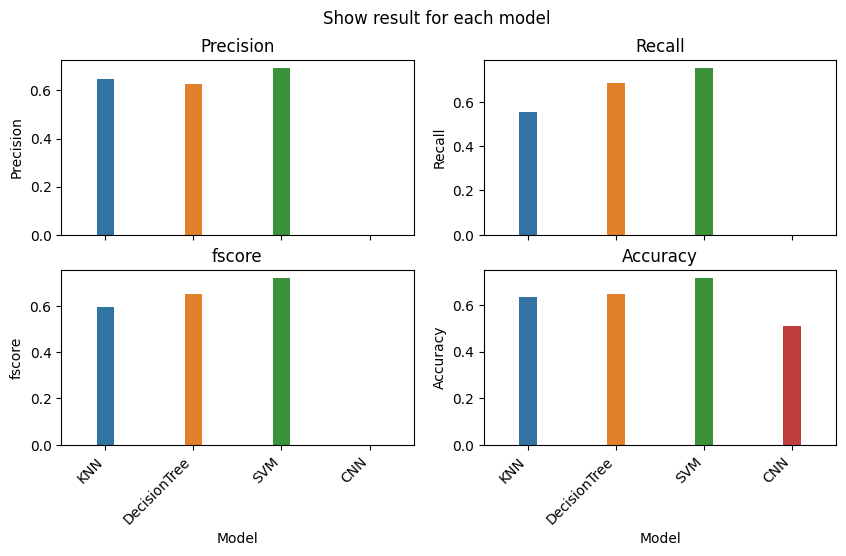

In [ ]:
plt.figure(figsize=(10,5))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

sns.barplot(x=df_all_result_positive["Model"], y = df_all_result_positive.Precision, data = df_all_result_positive, width = 0.2,ax=axes[0, 0])
axes[0,0].set_title("Precision")
axes[0,0].set_xticklabels([])
axes[0,0].set_xlabel("")

sns.barplot(x=df_all_result_positive["Model"], y = df_all_result_positive.Recall, data = df_all_result_positive, width = 0.2,ax=axes[0, 1])
axes[0,1].set_title("Recall")
axes[0,1].set_xticklabels([])
axes[0,1].set_xlabel("")

sns.barplot(x=df_all_result_positive["Model"], y = df_all_result_positive["fscore"], data = df_all_result_positive, width = 0.2,ax=axes[1, 0])
axes[1,0].set_title("fscore")

#use negative because the accarucy is stored there. This has no meaning with the negative class
sns.barplot(x=df_all_result_negative["Model"], y = df_all_result_negative.Accuracy, data = df_all_result_negative, width = 0.2,ax=axes[1, 1])
axes[1,1].set_title("Accuracy")

for ax in axes.flat:
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
fig.suptitle("Show result for each model")
plt.show()

As we can see from the confusion matrix and classification report will CNN produce a zero value for class 1. This is then shown in the graph "Show result for each model". This indicate that the model is bad at predicting class 1 (Positive). It is however better at classifying class 0 (Negative)

Can see that SVM is the model that performed best of all models. SVM should be good with text classification. Decision tree and KNN has somewhat lower result than SVM.
For CNN is hyperparameter tuning done, thus the hyperparameters should be somewhat optimized. Why CNN is preforming so bad, even if it should be good, could come from the word embeddings. The word2vec is trained on this dataset with 6000 rows and should be able to recognize the words, but this is maybe not enough words. To improve the model could word2vec be further trained with more text data or maybe use a pre-trained model, which is trained on more data. I was not able to use more data because of time and the fact that the session crashed.



Source:

https://spotintelligence.com/2023/01/10/cnn-in-nlp/

https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf

https://radimrehurek.com/gensim/models/word2vec.html